<a href="https://colab.research.google.com/github/ranaveergundaram/elevator/blob/main/one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving elevator_maintenance_dataset.csv to elevator_maintenance_dataset.csv




**Loading Data and Preprocessing**


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# 1. --- Load the Elevator Data from CSV ---
# Load the dataset (make sure the path to your CSV file is correct)
df = pd.read_csv('elevator_maintenance_dataset.csv', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataset
df.head()


,floor_trips,load_kg,temperature_C,humidity_%,error
date,,,,,
2023-01-01,116,389.800911,19.994248,36.528737,0
2023-01-02,128,460.159720,26.197669,40.283860,0
2023-01-03,107,293.961208,26.941588,62.004139,0
2023-01-04,123,443.660274,23.550441,43.431057,0
2023-01-05,133,449.843408,29.721960,39.530890,0


**Data Preprocessing and Feature Scaling**

In [ ]:
# 2. --- Data Preprocessing and Feature Engineering ---
# Here, we will scale the features, except the 'error' column which is the target variable
scaler = StandardScaler()
df[['floor_trips', 'load_kg', 'temperature_C', 'humidity_%']] = scaler.fit_transform(df[['floor_trips', 'load_kg', 'temperature_C', 'humidity_%']])

# Check the first few rows of the scaled data
df.head()


,floor_trips,load_kg,temperature_C,humidity_%,error
date,,,,,
2023-01-01,-0.322878,-0.367250,-1.690271,-1.468144,0
2023-01-02,0.586580,1.455852,0.346952,-1.092551,0
2023-01-03,-1.004972,-2.850600,0.591257,1.079949,0
2023-01-04,0.207639,1.028327,-0.522406,-0.777762,0
2023-01-05,0.965520,1.188541,1.504339,-1.167864,0


**Time Series Forecasting with ARIMA**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


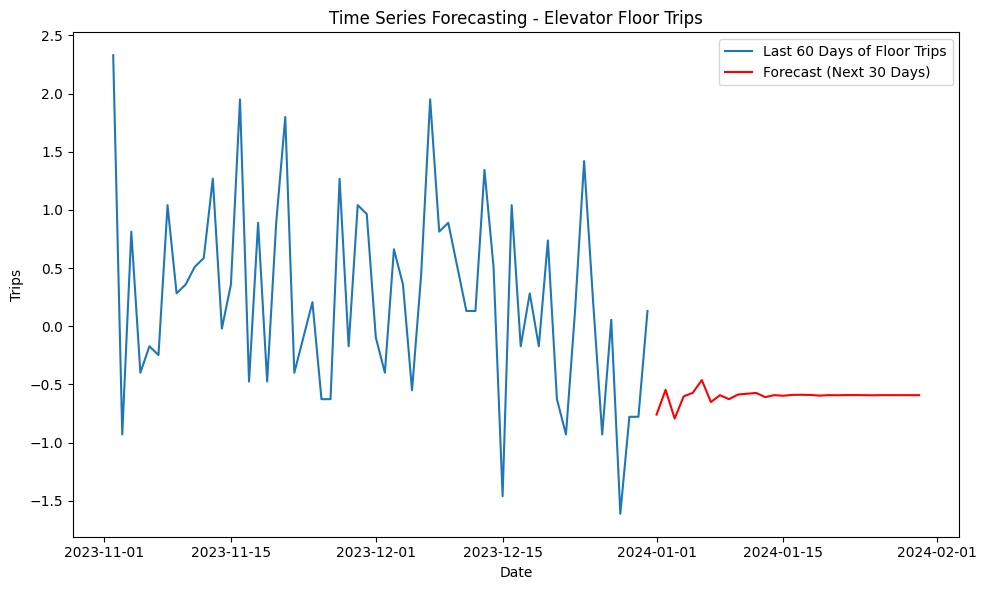

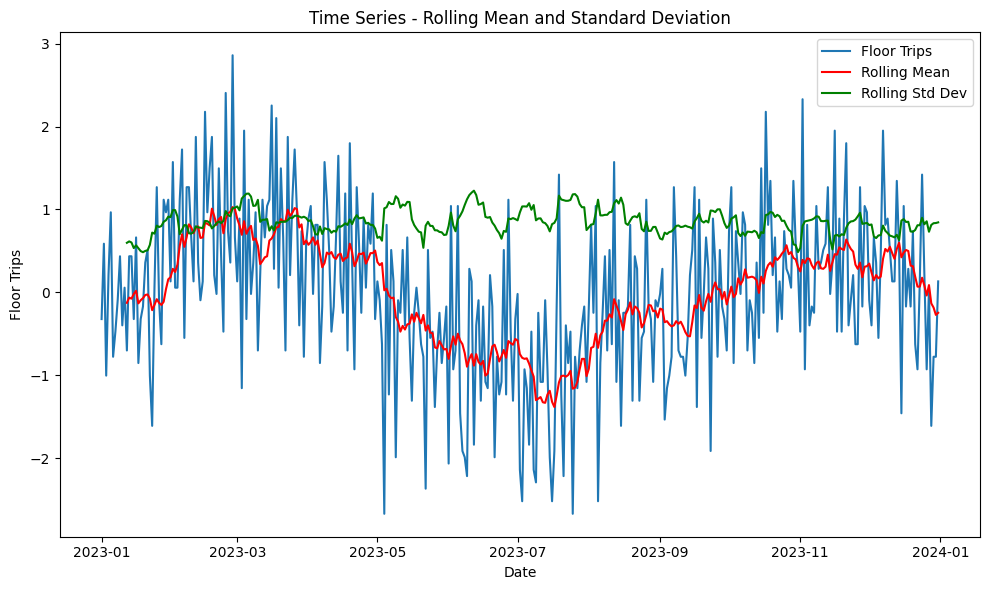


ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:            floor_trips   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -479.690
Date:                Mon, 12 May 2025   AIC                            971.380
Time:                        15:05:53   BIC                            994.763
Sample:                    01-01-2023   HQIC                           980.673
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9465      0.054    -17.678      0.000      -1.051      -0.842
ar.L2         -0.7883      0.071    -11.126      0.000      -0.927      -0.649
ar.L3         -0.5775      0.

In [ ]:
# 3. --- Time Series Forecasting with ARIMA ---
floor_series = df['floor_trips']

# Fit ARIMA model (order can be adjusted based on your data analysis)
arima_model = ARIMA(floor_series, order=(5, 1, 0))  # p=5, d=1, q=0 (this is a basic example)
arima_model_fit = arima_model.fit()

# Make a forecast for the next 30 days
forecast = arima_model_fit.forecast(steps=30)

# Plot the past floor trips and the forecasted future trips
plt.figure(figsize=(10, 6))
plt.plot(floor_series[-60:], label='Last 60 Days of Floor Trips')
plt.plot(pd.date_range(start=floor_series.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast (Next 30 Days)', color='red')
plt.title("Time Series Forecasting - Elevator Floor Trips")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.legend()
plt.tight_layout()
plt.show()

# Additional Plot - Checking for Stationarity using Rolling Mean and Standard Deviation
rolling_mean = floor_series.rolling(window=12).mean()
rolling_std = floor_series.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(floor_series, label='Floor Trips')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title("Time Series - Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Floor Trips")
plt.legend()
plt.tight_layout()
plt.show()

print("\nARIMA Model Summary:\n", arima_model_fit.summary())


**Non-Linear Regression (Random Forest)t**


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       0.00      0.00      0.00         2

    accuracy                           0.97        73
   macro avg       0.49      0.50      0.49        73
weighted avg       0.95      0.97      0.96        73

Random Forest - Accuracy Score: 0.9726027397260274


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


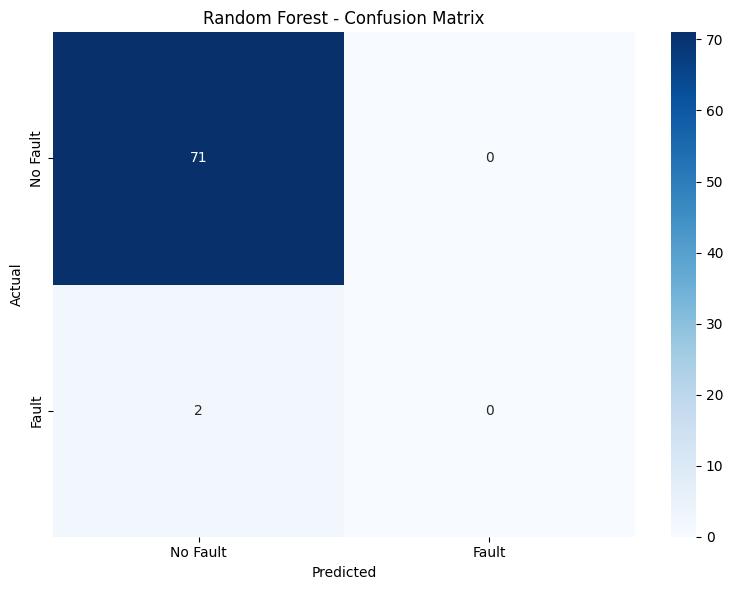

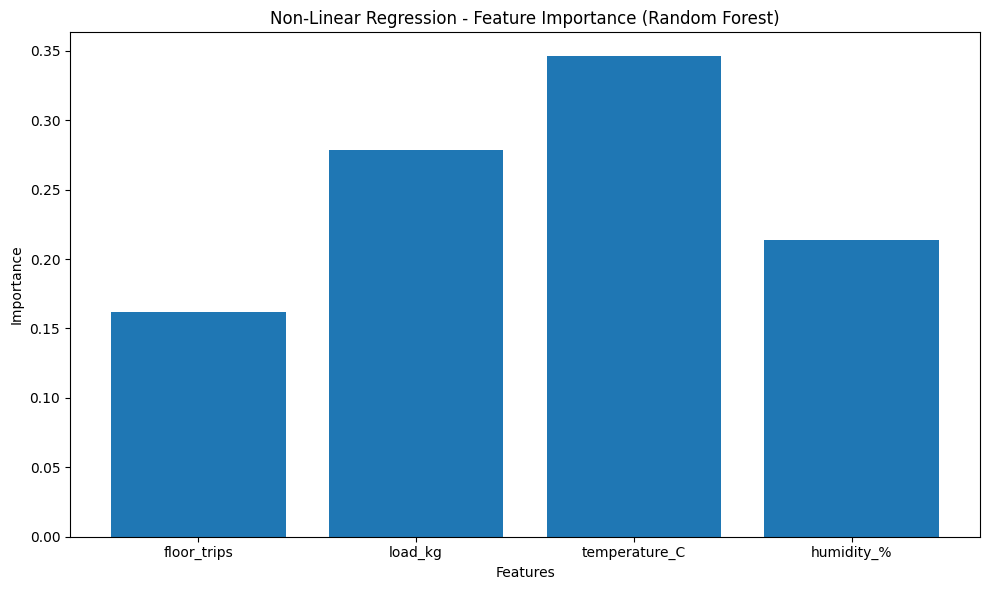

In [ ]:
# 4. --- Non-Linear Regression (Random Forest) for Predicting Faults ---
X = df[['floor_trips', 'load_kg', 'temperature_C', 'humidity_%']]  # Input features
y = df['error']  # Target variable (fault occurrence)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict the 'error' values (faults) on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest - Accuracy Score:", accuracy_score(y_test, y_pred))

# Additional: Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.title("Non-Linear Regression - Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
